# 1. Install Dependencies and Setup

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove low quality images

In [5]:
import cv2
import imghdr

C:\Users\Kenneth\AppData\Local\Temp\ipykernel_44988\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [32]:
data_dir = 'data' 

In [33]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [34]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [35]:
import numpy as np
from matplotlib import pyplot as plt

In [58]:
data = tf.keras.utils.image_dataset_from_directory('tracks_data', batch_size=10)

Found 114 files belonging to 2 classes.


In [59]:
data_iterator = data.as_numpy_iterator()

In [60]:
batch = data_iterator.next()

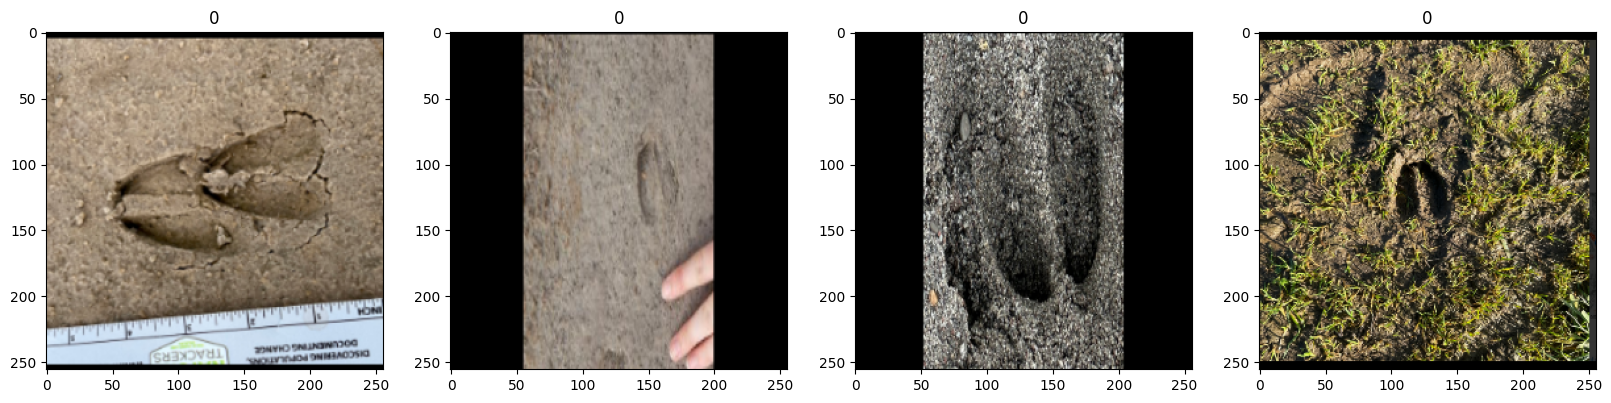

In [61]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [62]:
data = data.map(lambda x,y: (x/255, y))

In [63]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

# 5. Split Data

In [41]:
batch[0].shape

(32, 256, 256, 3)

In [64]:
len(data)

12

In [65]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [66]:
train_size

8

In [67]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [68]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [70]:
model = Sequential()

In [71]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [74]:
logdir='logs'

In [75]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [76]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback], batch_size=5)


Epoch 1/20


8/8 [==============================] - 3s 121ms/step - loss: 1.3976 - accuracy: 0.5875 - val_loss: 0.7242 - val_accuracy: 0.4500
Epoch 2/20
8/8 [==============================] - 1s 84ms/step - loss: 0.6990 - accuracy: 0.5500 - val_loss: 0.6625 - val_accuracy: 0.7000
Epoch 3/20
8/8 [==============================] - 1s 84ms/step - loss: 0.6581 - accuracy: 0.5500 - val_loss: 0.6562 - val_accuracy: 0.5500
Epoch 4/20
8/8 [==============================] - 1s 85ms/step - loss: 0.6413 - accuracy: 0.6250 - val_loss: 0.5771 - val_accuracy: 0.7500
Epoch 5/20
8/8 [==============================] - 1s 85ms/step - loss: 0.5739 - accuracy: 0.6375 - val_loss: 0.8291 - val_accuracy: 0.5500
Epoch 6/20
8/8 [==============================] - 1s 88ms/step - loss: 0.5691 - accuracy: 0.6750 - val_loss: 0.5822 - val_accuracy: 0.7500
Epoch 7/20
8/8 [==============================] - 1s 83ms/step - loss: 0.5304 - accuracy: 0.7625 - val_loss: 0.4861 - val_accuracy: 0.8000
Epoch 8/20
8/8 [=====================

In [77]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 1s 90ms/step - loss: 0.0924 - accuracy: 0.9750 - val_loss: 0.0716 - val_accuracy: 1.0000
Epoch 2/20
8/8 [==============================] - 1s 87ms/step - loss: 0.1782 - accuracy: 0.9625 - val_loss: 0.1165 - val_accuracy: 0.9000
Epoch 3/20
8/8 [==============================] - 1s 88ms/step - loss: 0.1509 - accuracy: 0.9500 - val_loss: 0.1754 - val_accuracy: 0.9500
Epoch 4/20
8/8 [==============================] - 1s 85ms/step - loss: 0.1287 - accuracy: 0.9625 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 1s 89ms/step - loss: 0.0622 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 1s 85ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 1s 84ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 8/20
8/8 [===========

# 8. Plot Performance

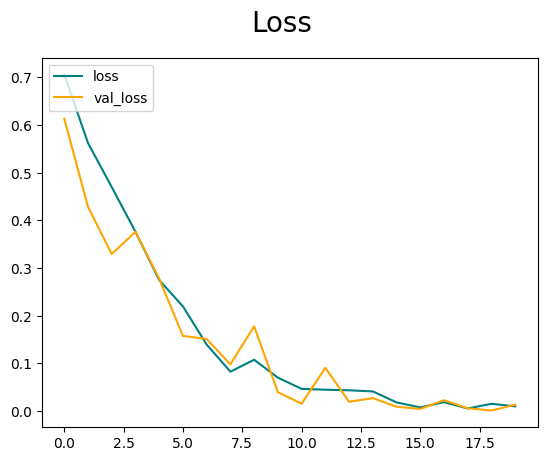

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

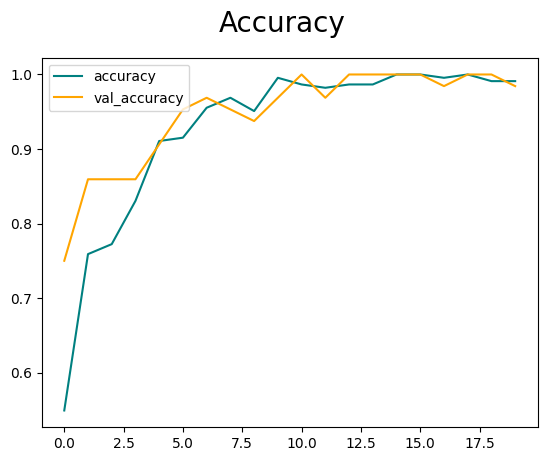

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [78]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [79]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [80]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 219ms/step


In [81]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [82]:
import cv2

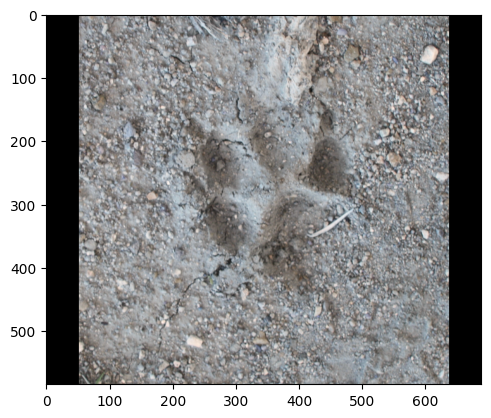

In [89]:
img = cv2.imread('tracks_data/dog/Screenshot 2023-12-21 133526 (2).png')
plt.imshow(img)
plt.show()

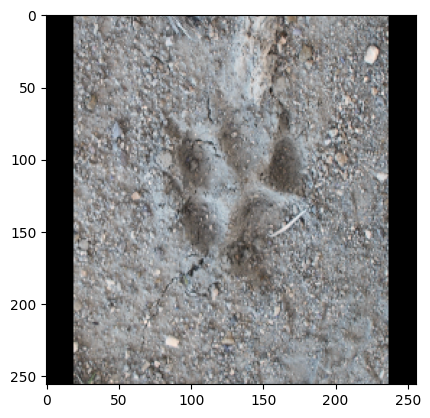

In [90]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [92]:
yhat

array([[0.9999225]], dtype=float32)

In [93]:
if yhat > 0.5: 
    print(f'its a dog!')
else:
    print(f'its a deer!')

its a dog!


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)